In [1]:
pip install tensorflow

     |████████████████████████████████| 1.7 MB 62.4 MB/s            
     |████████████████████████████████| 438 kB 61.7 MB/s            
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.10.0 which is incompatible.
tensorflow-cpu 2.7.0 requires tensorflow-estimator<2.8,~=2.7.0rc0, but you have tensorflow-estimator 2.10.0 which is incompatible.
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade

In [4]:
pip install tabulate

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import tabulate

from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from IPython.core.formatters import format_display_data
from matplotlib import pyplot as plt

mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['figure.facecolor'] = '1'

In [6]:
rowNum = 8000
rowNumTest = 400
# rowNum = 4800
# rowNumTest = 912
# rowNum = 4500
# rowNumTest = 681
# rowNum = 2000
# rowNumTest = 364
#rowNum = 700
#rowNumTest = 107
#df = pd.read_csv(f'./common_resultStaticsDf_process_more_{rowNum}_list.csv')
df = pd.read_csv(f'./common_resultStaticsDf_process_more_{rowNum}_list_withZero_cropped.csv')
#dfHidden = pd.read_csv(f'./common_resultStaticsDf_process_more_{rowNum}_list_withZero_cropped_withHidden.csv')
dfHidden = pd.read_csv(f'./common_resultStaticsDf_process_more_{rowNum}_list_withZero_cropped.csv')
dfTest = pd.read_csv(f'./common_resultStaticsDf_process_more_{rowNumTest}_list_relustTest_{rowNum}.csv')


#df.head()
#dfHidden.head()
#dfTest.size()

In [7]:
max_review_op_length = 48
newIndex = np.arange(0,max_review_op_length)
max_review_length = 49
max_review_length_last = max_review_length - 1
newIndexDataArr = np.append(newIndex, max_review_length_last)
newIndexDataArr

array([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [8]:
#max_review_length = 25
value_tactic = 2
dataset = df.values
datasetHidden = dfHidden.values
X = dataset[:,newIndexDataArr].astype(float)
Y = dataset[:,max_review_length]
XHidden = datasetHidden[:,newIndexDataArr].astype(float)
YHidden = datasetHidden[:,max_review_length]

# XTest = dfTest[:,newIndexDataArr].astype(float)
# YTest = dfTest[:,max_review_length]
print('X test: ', X)
print('Y test: ', Y)
display(X[:max_review_length])
display(Y[:max_review_length])

X test:  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Y test:  ['MiddleFieldAttack' 'MiddleFieldAttack' 'MiddleFieldAttack' ...
 'MiddleFieldSave' 'MiddleFieldSave' 'MiddleFieldSave']


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

array(['MiddleFieldAttack', 'MiddleFieldAttack', 'MiddleFieldAttack',
       'MiddleFieldAttack', 'MiddleFieldAttack', 'MiddleFieldAttack',
       'MiddleFieldAttack', 'MiddleFieldAttack', 'MiddleFieldAttack',
       'MiddleFieldAttack', 'MiddleFieldAttack', 'MiddleFieldAttack',
       'MiddleFieldAttack', 'MiddleFieldAttack', 'MiddleFieldAttack',
       'MiddleFieldAttack', 'MiddleFieldAttack', 'MiddleFieldAttack',
       'MiddleFieldAttack', 'MiddleFieldAttack', 'MiddleFieldAttack',
       'MiddleFieldAttack', 'MiddleFieldAttack', 'MiddleFieldAttack',
       'MiddleFieldAttack', 'MiddleFieldAttack', 'MiddleFieldAttack',
       'MiddleFieldAttack', 'MiddleFieldAttack', 'MiddleFieldAttack',
       'MiddleFieldAttack', 'MiddleFieldAttack', 'MiddleFieldAttack',
       'MiddleFieldAttack', 'MiddleFieldAttack', 'MiddleFieldAttack',
       'MiddleFieldAttack', 'MiddleFieldAttack', 'MiddleFieldAttack',
       'MiddleFieldAttack', 'MiddleFieldAttack', 'MiddleFieldAttack',
       'MiddleFieldA

In [53]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
 [1., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.],
 ...,
 [0., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
datasetTest = dfTest.values
XTest = datasetTest[:,newIndexDataArr].astype(float)
YTest = datasetTest[:,max_review_length]

In [10]:
encoder = LabelEncoder()
Y_e = encoder.fit_transform(Y)
Y_d = keras.utils.to_categorical(Y_e)

Y_e_hidden = encoder.fit_transform(YHidden)
Y_d_hidden = keras.utils.to_categorical(Y_e_hidden)

Y_e_test = encoder.fit_transform(YTest)
Y_d_test = keras.utils.to_categorical(Y_e_test)
display(Y_e)
display(Y_d[:max_review_length])

# with open('./Y_encoded.txt', 'w') as f:
#     formatted, _ = format_display_data(Y_e)
#     f.write(formatted['text/plain'])

# with open('./Y_dummy.txt', 'w') as f:
#     formatted, _ = format_display_data(Y_d[:4])
#     f.write(formatted['text/plain'])

array([0, 0, 0, ..., 1, 1, 1])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [126]:
XTest

array([[0., 0., 0., ..., 0., 0., 1.],
 [0., 0., 0., ..., 0., 0., 1.],
 [0., 0., 0., ..., 0., 0., 1.],
 ...,
 [0., 0., 0., ..., 0., 0., 1.],
 [0., 0., 0., ..., 0., 0., 1.],
 [0., 0., 0., ..., 0., 0., 1.]])

In [121]:
Y_d

In [122]:
Y_d_test

In [ ]:
#x_train, x_val, y_train, y_val = train_test_split(mfcc_data, train['label_number'], test_size=0.2, random_state=42)

In [11]:
model = keras.models.Sequential([
    keras.layers.Dense(max_review_op_length+1, activation='relu'),

    keras.layers.Dense(value_tactic, activation='sigmoid')
])
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, Y_d, epochs=5, batch_size=10, validation_split=0.1, verbose=1)
score = model.evaluate(XTest, Y_d_test)

Epoch 1/5
720/720 [==============================] - 2s 2ms/step - loss: 0.6015 - accuracy: 0.6715 - val_loss: 0.7450 - val_accuracy: 0.5500
Epoch 2/5
720/720 [==============================] - 1s 1ms/step - loss: 0.5129 - accuracy: 0.7541 - val_loss: 0.6977 - val_accuracy: 0.5863
Epoch 3/5
720/720 [==============================] - 1s 1ms/step - loss: 0.4721 - accuracy: 0.7846 - val_loss: 0.4955 - val_accuracy: 0.7738
Epoch 4/5
720/720 [==============================] - 1s 1ms/step - loss: 0.4442 - accuracy: 0.7962 - val_loss: 0.6089 - val_accuracy: 0.6575
Epoch 5/5
13/13 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8195


In [9]:
#score
print("Точность обучения: {0:.2%}".format(score[1]))

Точность обучения: 81.20%


In [ ]:
#history_hidden = model.fit(XHidden, Y_d_hidden, epochs=5, batch_size=10, validation_split=0.1, verbose=1)

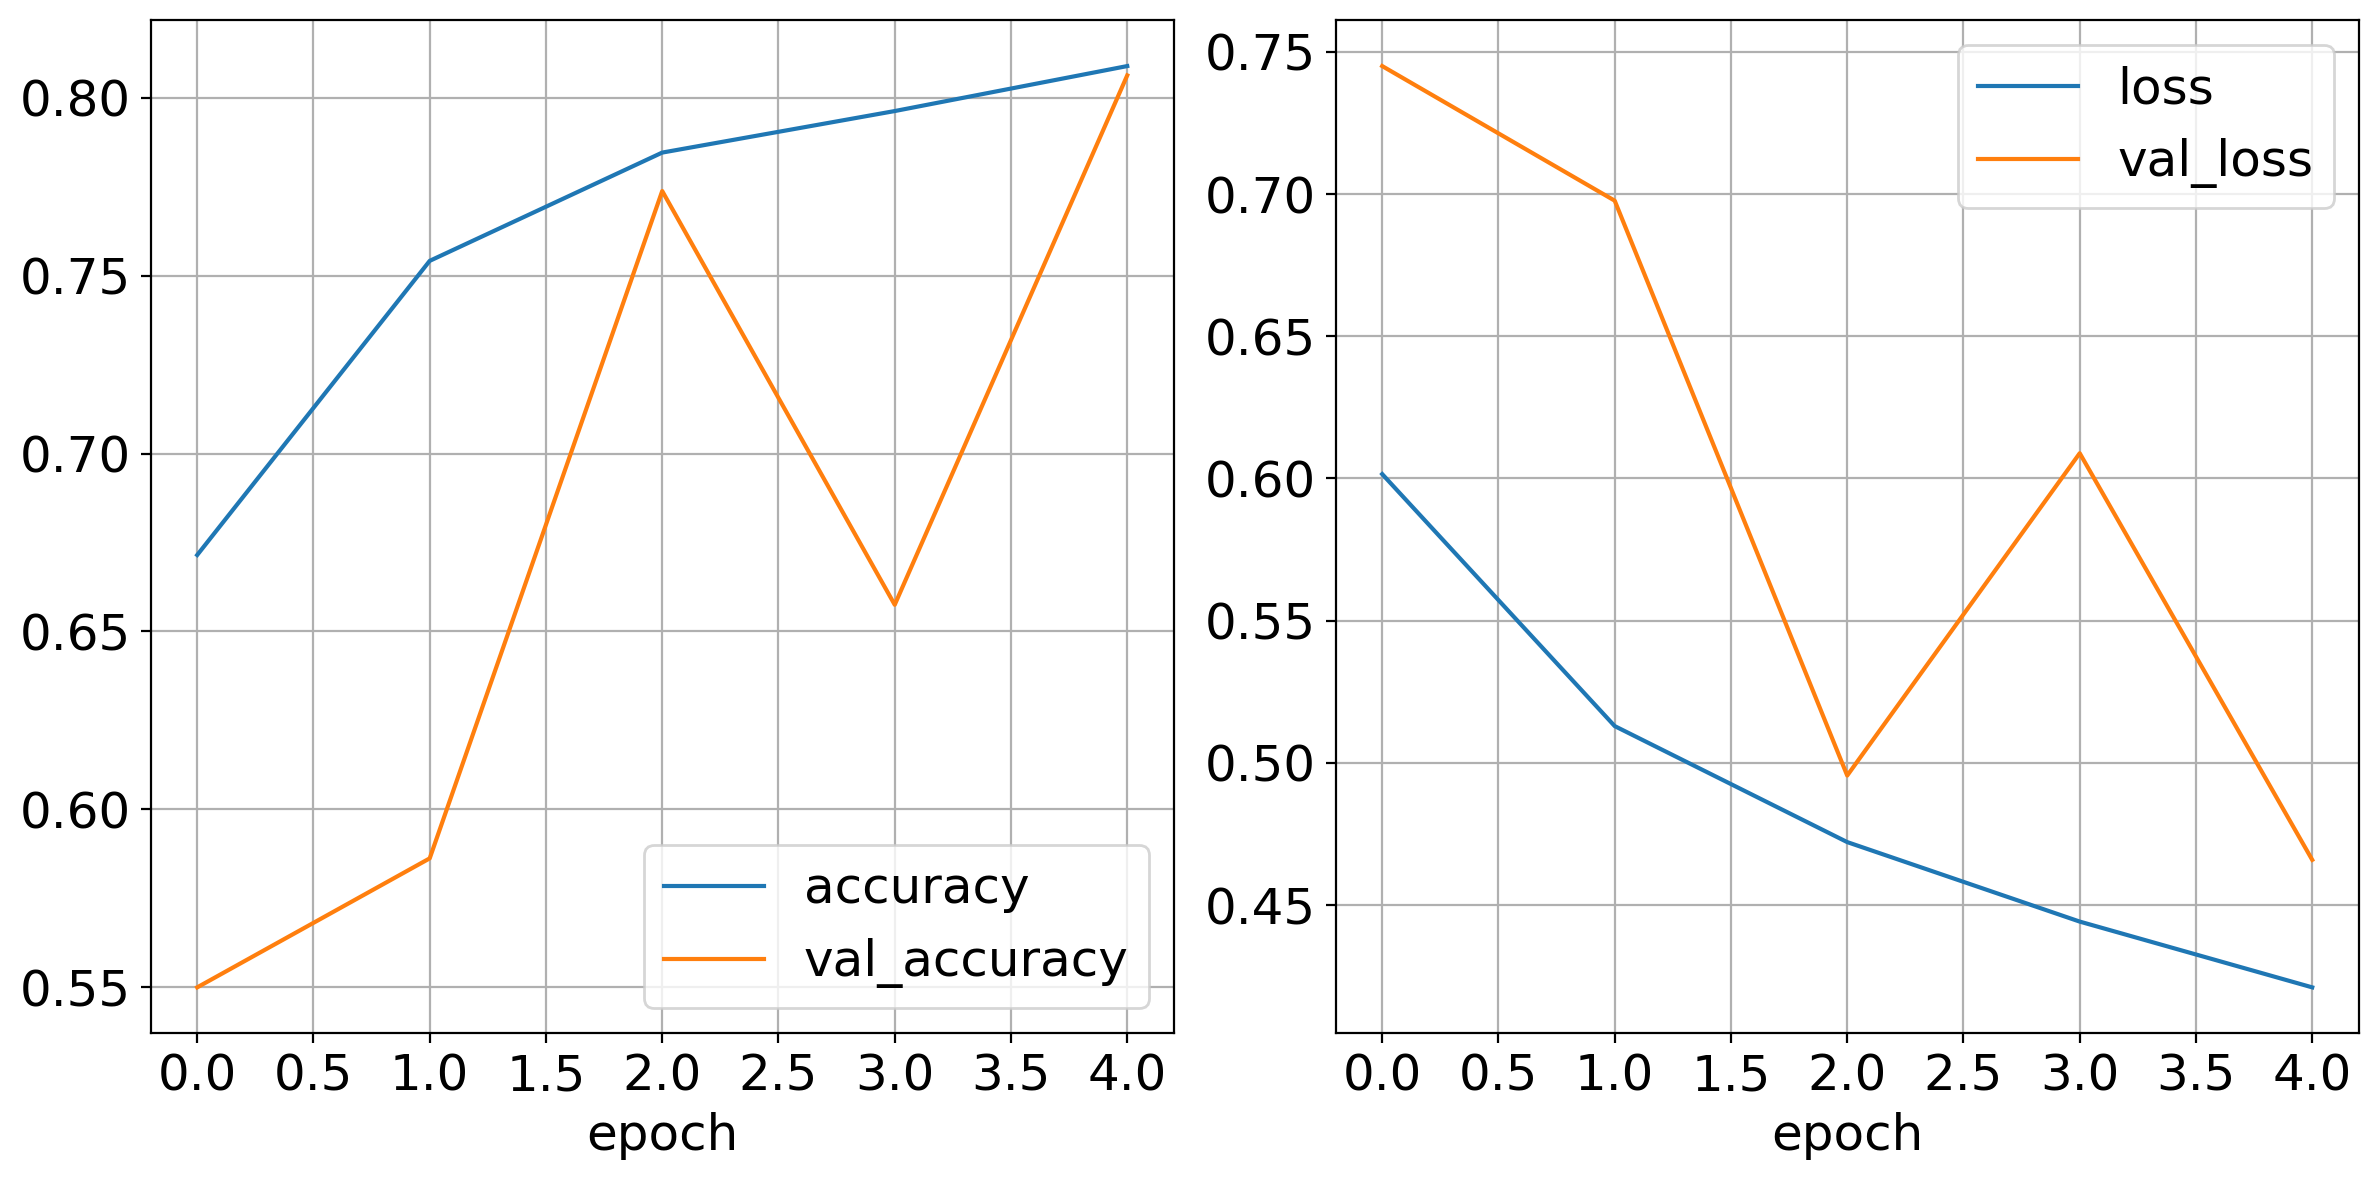

In [12]:
def plot_history(history, ax1=None, ax2=None):
    df_h = pd.DataFrame(history.history)
    if ax1 is None:
        _, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 6))
    df_h[['accuracy', 'val_accuracy']].plot(ax=ax1, fontsize=18)
    df_h[['loss', 'val_loss']].plot(ax=ax2, fontsize=18)
    for ax in [ax1, ax2]:
        ax.legend(fontsize=18)
        ax.set_xlabel('epoch', fontsize=18)
        #ax.rc(fontsize=20)
        ax.grid(0.75)
        ax.set_axisbelow(True)

plot_history(history)
plt.gcf().tight_layout()
plt.savefig('h0.png')

In [13]:
from sklearn.model_selection import KFold

In [37]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)

histories = []
scores = []
neyron = max_review_op_length+1

for train_index, test_index in kf.split(X, Y_d):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y_d[train_index], Y_d[test_index]
    model = keras.models.Sequential([
        keras.layers.Dense(neyron, activation='relu'),
        keras.layers.Dropout(0.2, noise_shape=None, seed=None),
        keras.layers.Dense(neyron / 2, activation='relu'),
        keras.layers.Dropout(0.1, noise_shape=None, seed=None),
        keras.layers.Dense(neyron / 3, activation='relu'),
        keras.layers.Dense(value_tactic, activation='softmax')
    ])
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=500, batch_size=1000, verbose=1, validation_data=(X_test, Y_test))
    score = model.evaluate(XTest, Y_d_test, verbose=0)
    #print("Точность обучения: {0:.2%}".format(score[1]))
    scores.append(score)
    histories.append(history)

Epoch 1/500
7/7 [==============================] - 1s 33ms/step - loss: 0.7303 - accuracy: 0.5174 - val_loss: 0.6858 - val_accuracy: 0.5600
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6900 - accuracy: 0.5531 - val_loss: 0.6756 - val_accuracy: 0.5719
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6767 - accuracy: 0.5717 - val_loss: 0.6627 - val_accuracy: 0.6075
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6635 - accuracy: 0.6010 - val_loss: 0.6501 - val_accuracy: 0.6375
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6560 - accuracy: 0.6156 - val_loss: 0.6380 - val_accuracy: 0.6494
Epoch 6/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6433 - accuracy: 0.6253 - val_loss: 0.6257 - val_accuracy: 0.6587
Epoch 7/500
7/7 [==============================] - 0s 8ms/step - loss: 0.6310 - accuracy: 0.6432 - val_loss: 0.6144 - val_accuracy: 0.6794
Epoch 8/500
7/7 [=========

In [42]:
# 2 стрратегии после мёрджа
# Точность обучения: 81.20%
# Точность обучения: 83.71%
# Точность обучения: 82.46%
# Точность обучения: 80.95%
# Точность обучения: 82.21%

# sigmoid
# Точность обучения: 81.95%
# Точность обучения: 80.70%
# Точность обучения: 80.45%
# Точность обучения: 81.95%
# Точность обучения: 81.70%

# softmax (3 hidden layers)
# Точность обучения: 83.71%
# Точность обучения: 78.45%
# Точность обучения: 80.45%
# Точность обучения: 82.96%
# Точность обучения: 82.21%

# softmax (1 hidden layers - 400 эпох)
# Точность обучения: 83.46%
# Точность обучения: 82.46%
# Точность обучения: 82.96%
# Точность обучения: 81.70%
# Точность обучения: 83.46%
for scoreItem in scores:
    print("Точность обучения: {0:.2%}".format(scoreItem[1]))
    #print(scoreItem)

Точность обучения: 77.94%
Точность обучения: 82.46%
Точность обучения: 80.70%
Точность обучения: 80.70%
Точность обучения: 79.70%


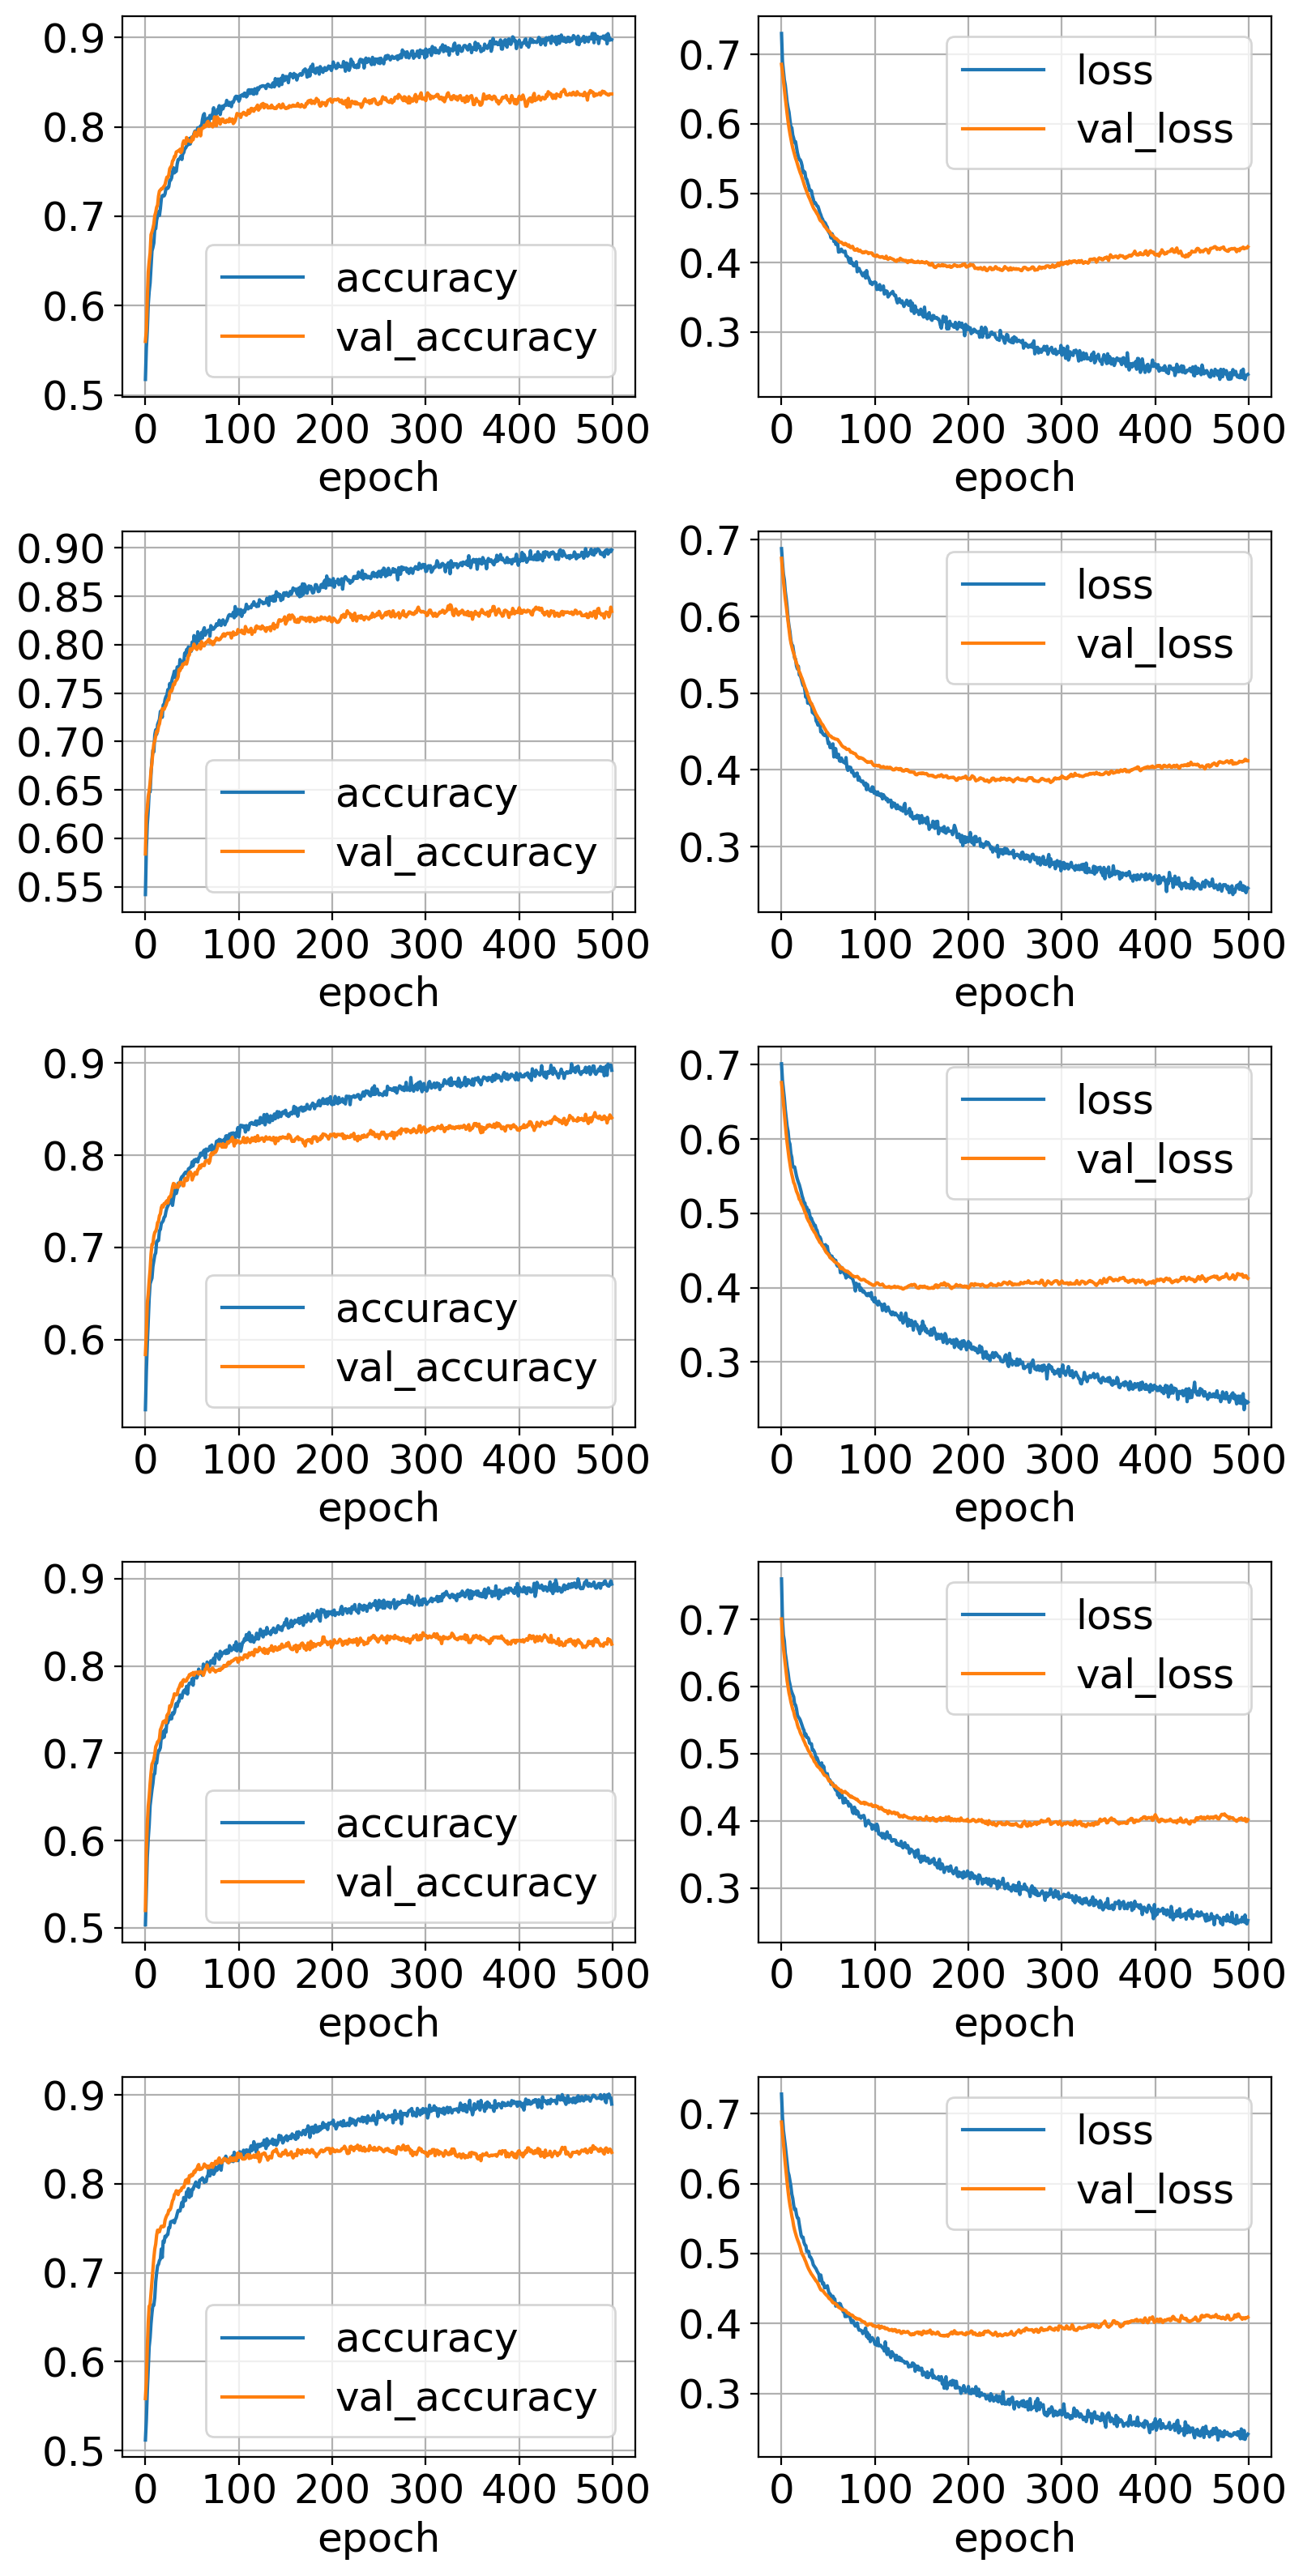

In [41]:
# Точность обучения: 81.45%
# Точность обучения: 80.70%
# Точность обучения: 77.69%
# Точность обучения: 80.70%
# Точность обучения: 82.21%

# Доп слой
# Точность обучения: 81.45%
# Точность обучения: 82.46%
# Точность обучения: 78.95%
# Точность обучения: 83.21%
# Точность обучения: 79.70%

fig, axes = plt.subplots(5, 2, figsize=(8, 16))

for history, [ax1, ax2] in zip(histories, axes):
    plot_history(history, ax1, ax2)
    
fig.tight_layout()
#fig.savefig('h1.png')

In [143]:
# 5 стрратегий
for scoreItem in scores:
    print("Точность обучения: {0:.2%}".format(scoreItem[1]))
    #print(scoreItem)

Точность обучения: 59.12%
Точность обучения: 60.59%
Точность обучения: 59.71%
Точность обучения: 61.18%
Точность обучения: 57.65%


In [114]:
# Три стратегии

# 200 batch и 150 итераций
# Точность обучения: 75.21%
# Точность обучения: 70.74%
# Точность обучения: 74.38%
# Точность обучения: 74.21%
# Точность обучения: 75.04%

# 250 стратегий  900 батч
# Точность обучения: 74.38%
# Точность обучения: 69.59%
# Точность обучения: 73.06%
# Точность обучения: 76.69%
# Точность обучения: 76.36%

for scoreItem in scores:
    print("Точность обучения: {0:.2%}".format(scoreItem[1]))
    #print(scoreItem)

Точность обучения: 74.21%
Точность обучения: 71.74%
Точность обучения: 74.55%
Точность обучения: 74.21%
Точность обучения: 75.70%


In [119]:
# Две стратегии
# При конфигурации 400 эпох, скрытый слой:
#keras.layers.Dropout(0.2, noise_shape=None, seed=None),
#       keras.layers.Dense(20, activation='relu'),
# 79.89%
# Точность обучения: 79.89%
# Точность обучения: 74.66%
# Точность обучения: 78.51%
# Точность обучения: 80.17%

for scoreItem in scores:
    print("Точность обучения: {0:.2%}".format(scoreItem[1]))
    #print(scoreItem)

Точность обучения: 75.70%
Точность обучения: 72.23%
Точность обучения: 74.88%
Точность обучения: 75.04%
Точность обучения: 71.90%


In [42]:
# Точность epochs=150, batch_size=20 и слой как выше в первом
# Точность обучения: 80.17%
# Точность обучения: 78.51%
# Точность обучения: 73.28%
# Точность обучения: 79.61%
# Точность обучения: 76.03%
for scoreItem in scores:
    print("Точность обучения: {0:.2%}".format(scoreItem[1]))
    #print(scoreItem)

Точность обучения: 76.31%
Точность обучения: 76.58%
Точность обучения: 85.12%
Точность обучения: 81.82%
Точность обучения: 73.83%


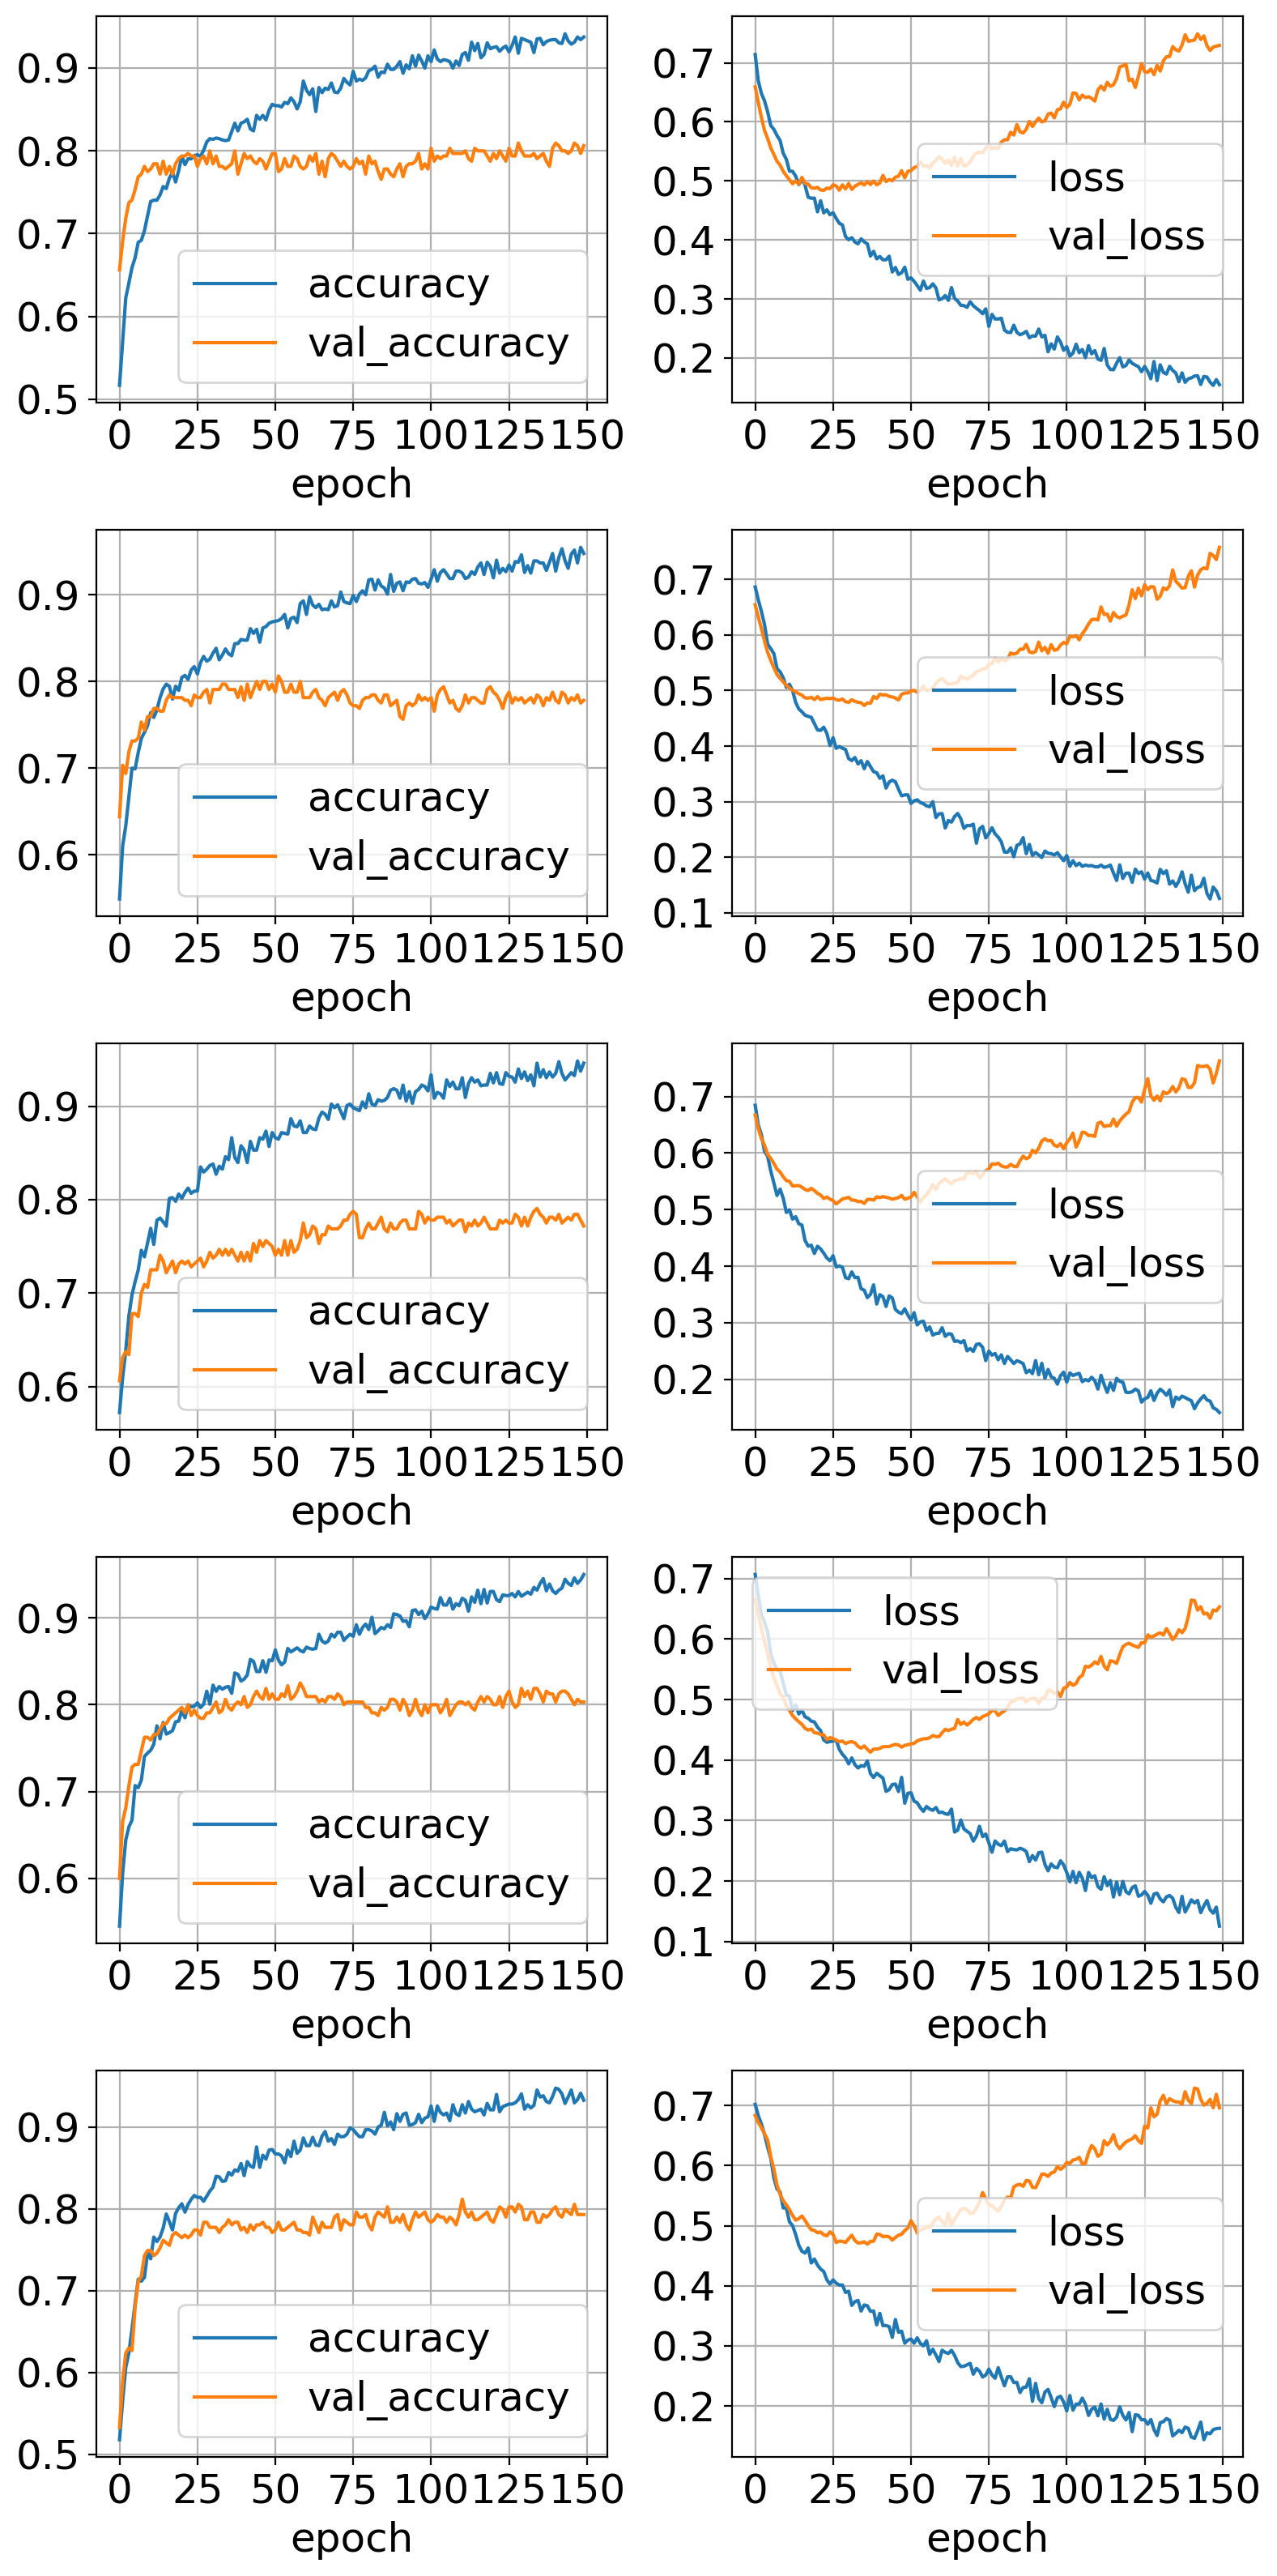

In [23]:
fig, axes = plt.subplots(5, 2, figsize=(8, 16))

for history, [ax1, ax2] in zip(histories, axes):
    plot_history(history, ax1, ax2)
    
fig.tight_layout()
#fig.savefig('h1.png')

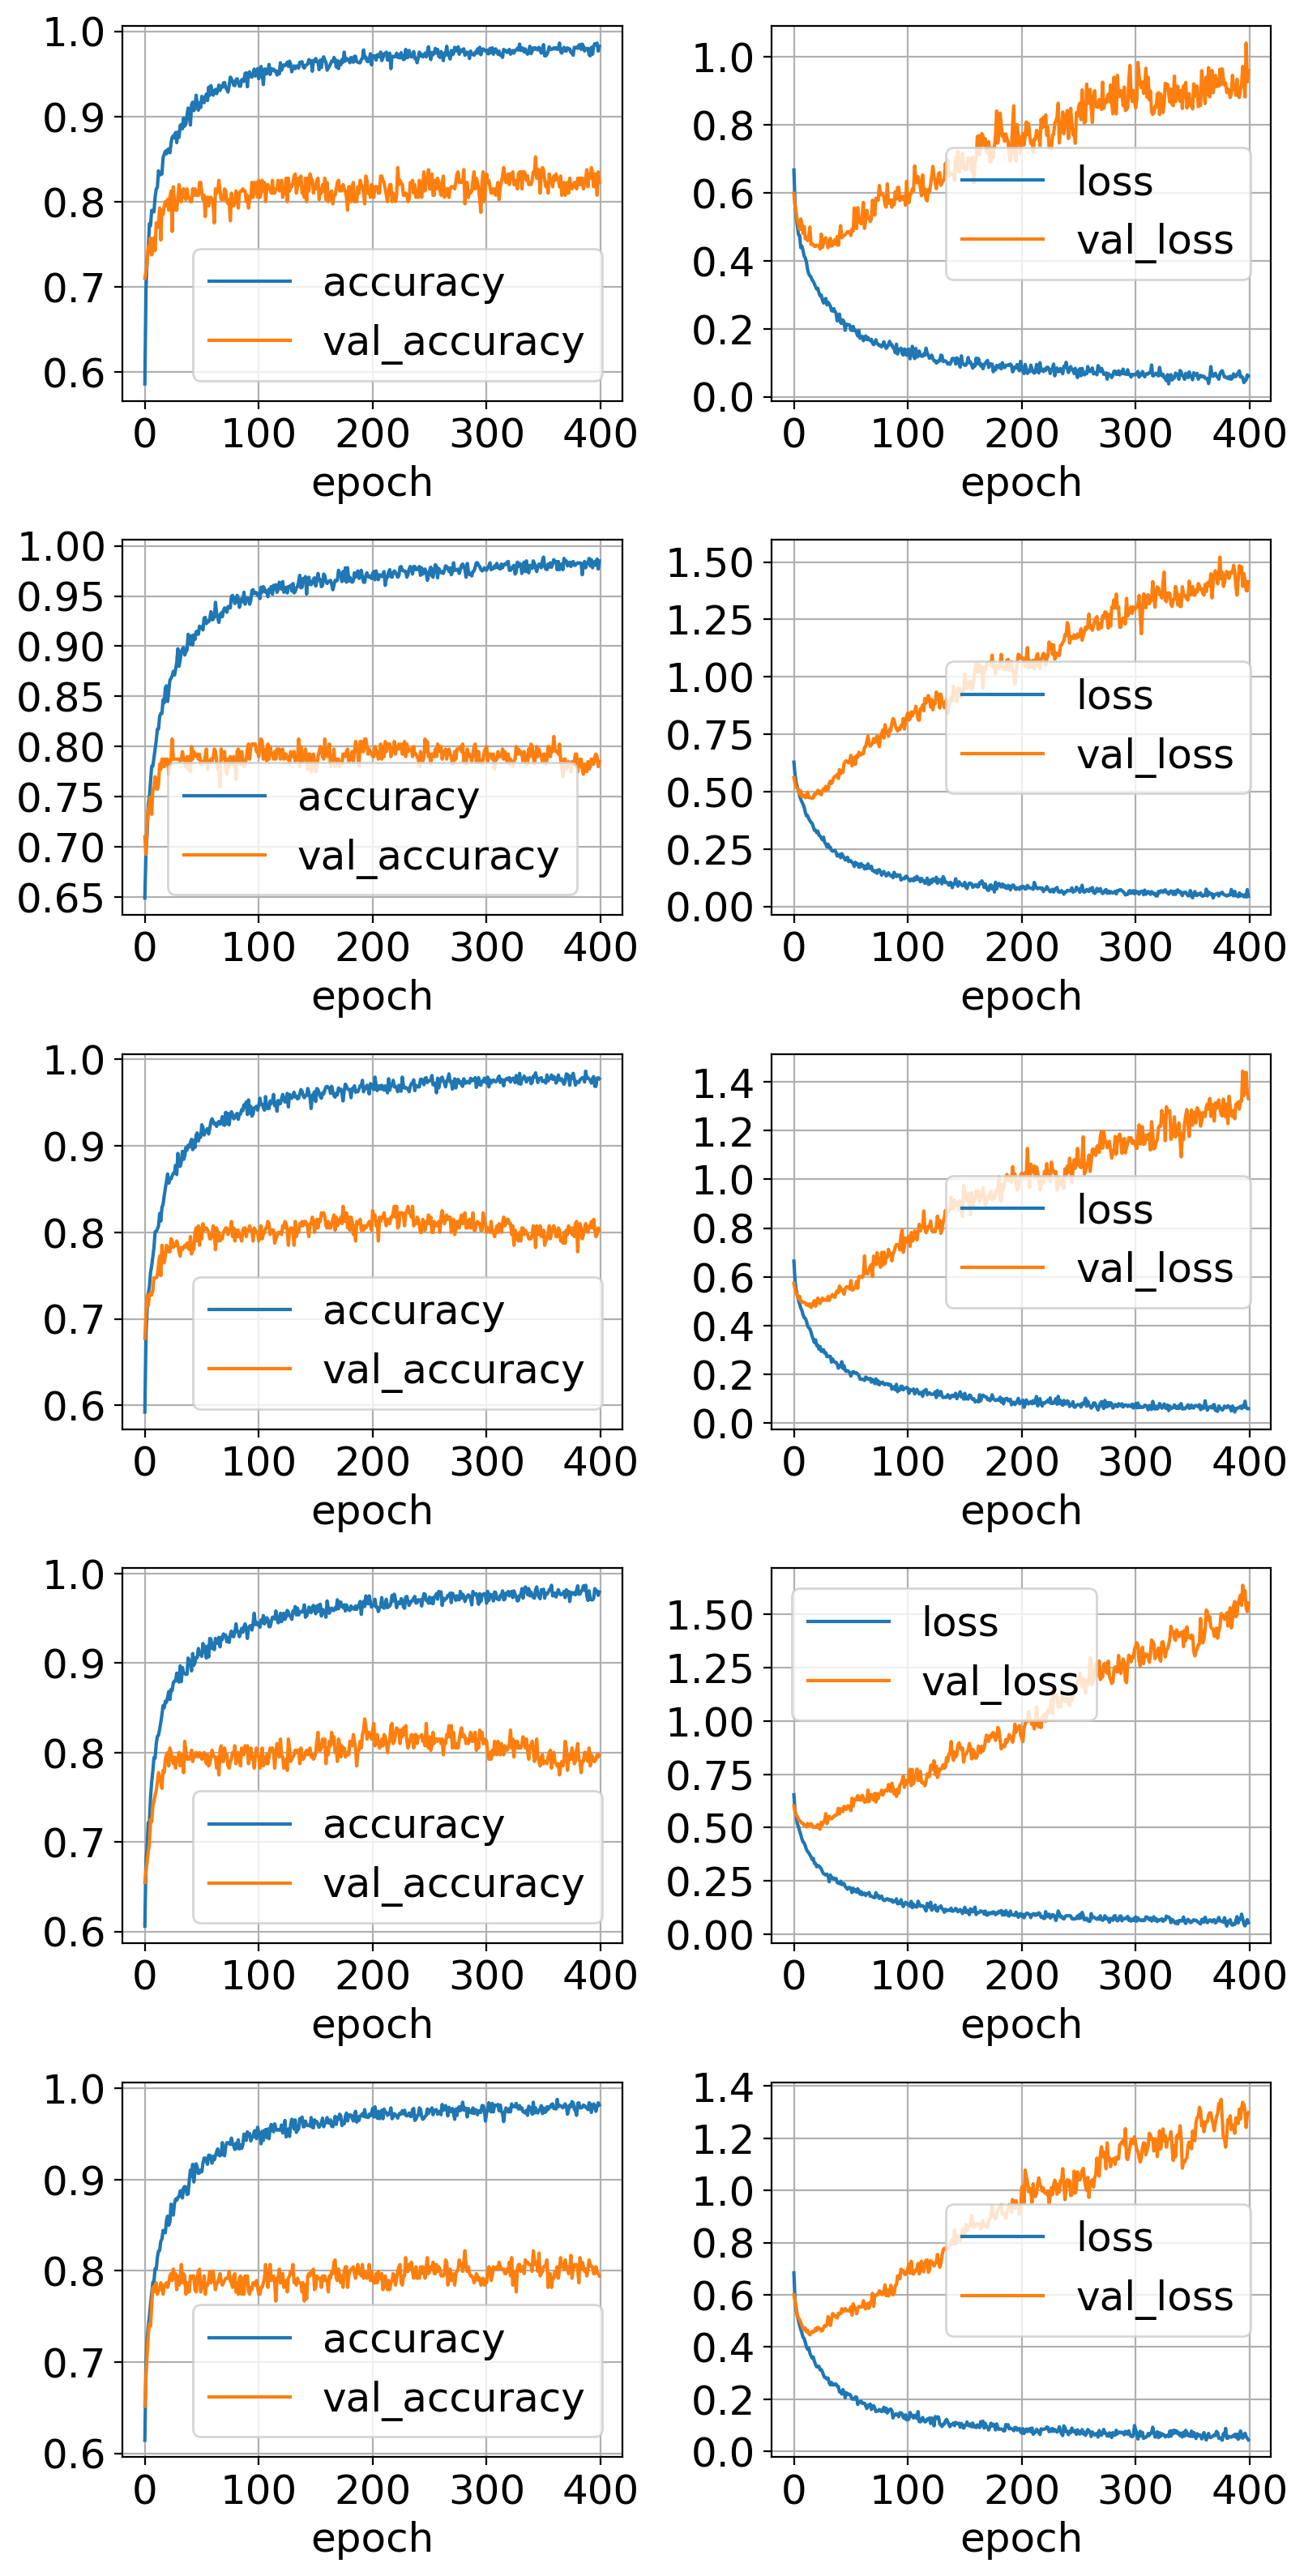

In [17]:
fig, axes = plt.subplots(5, 2, figsize=(8, 16))

for history, [ax1, ax2] in zip(histories, axes):
    plot_history(history, ax1, ax2)
    
fig.tight_layout()
#fig.savefig('h1.png')

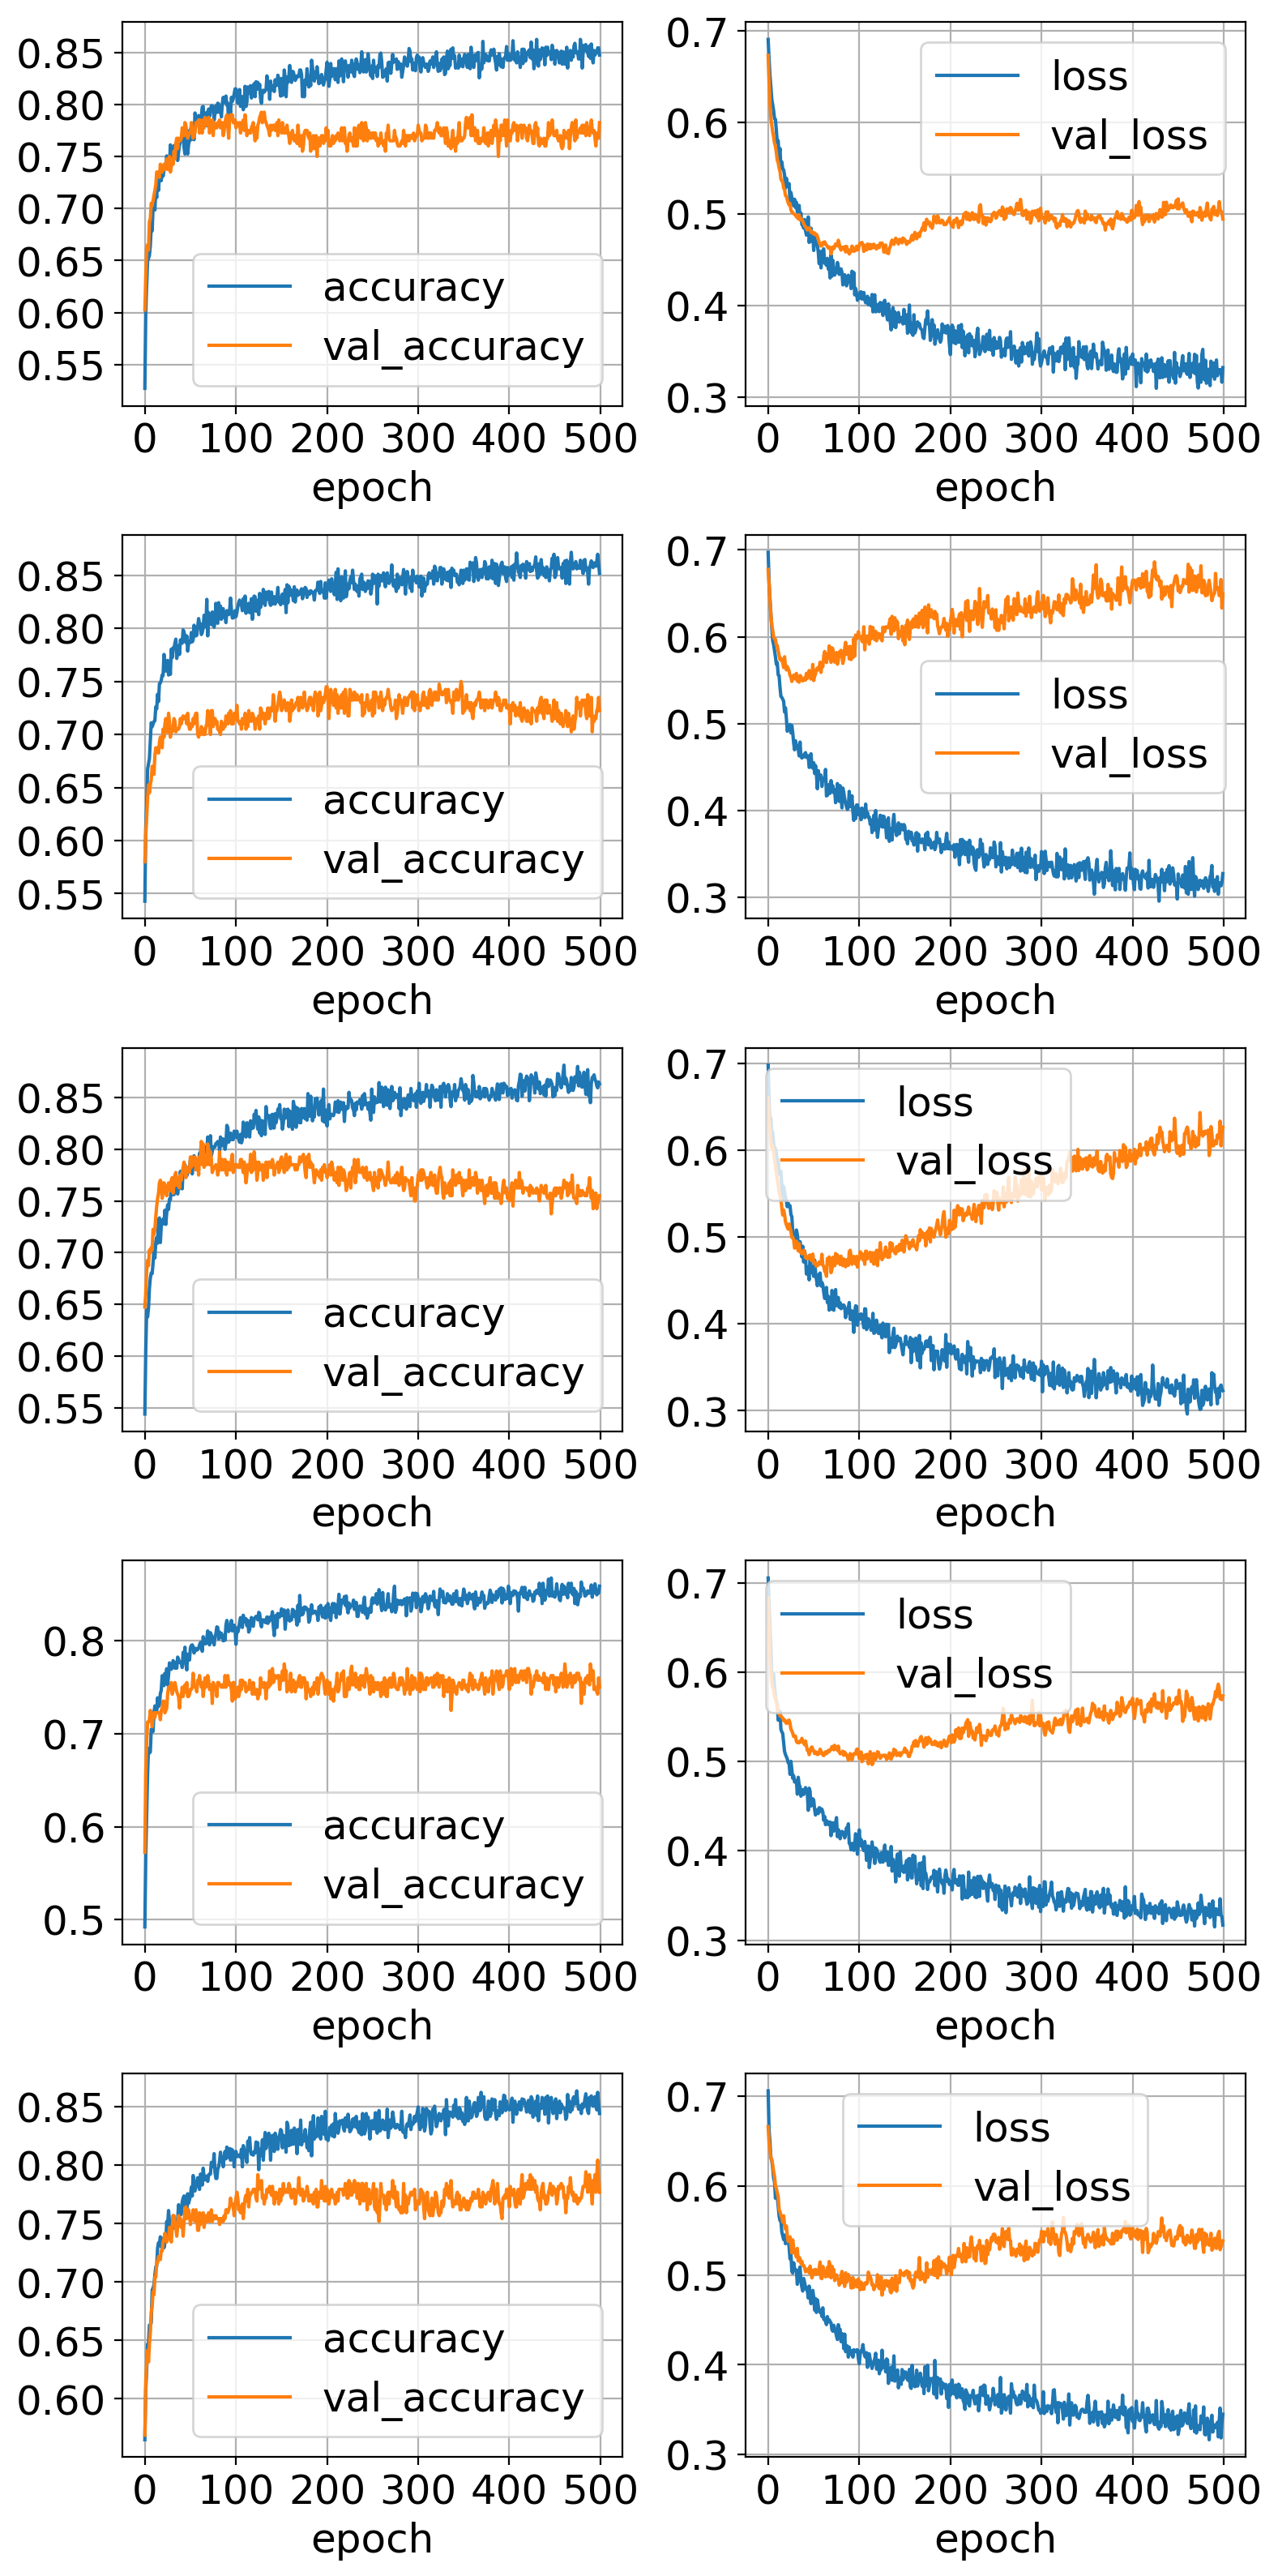

In [38]:
fig, axes = plt.subplots(5, 2, figsize=(8, 16))

for history, [ax1, ax2] in zip(histories, axes):
    plot_history(history, ax1, ax2)
    
fig.tight_layout()
#fig.savefig('h1.png')

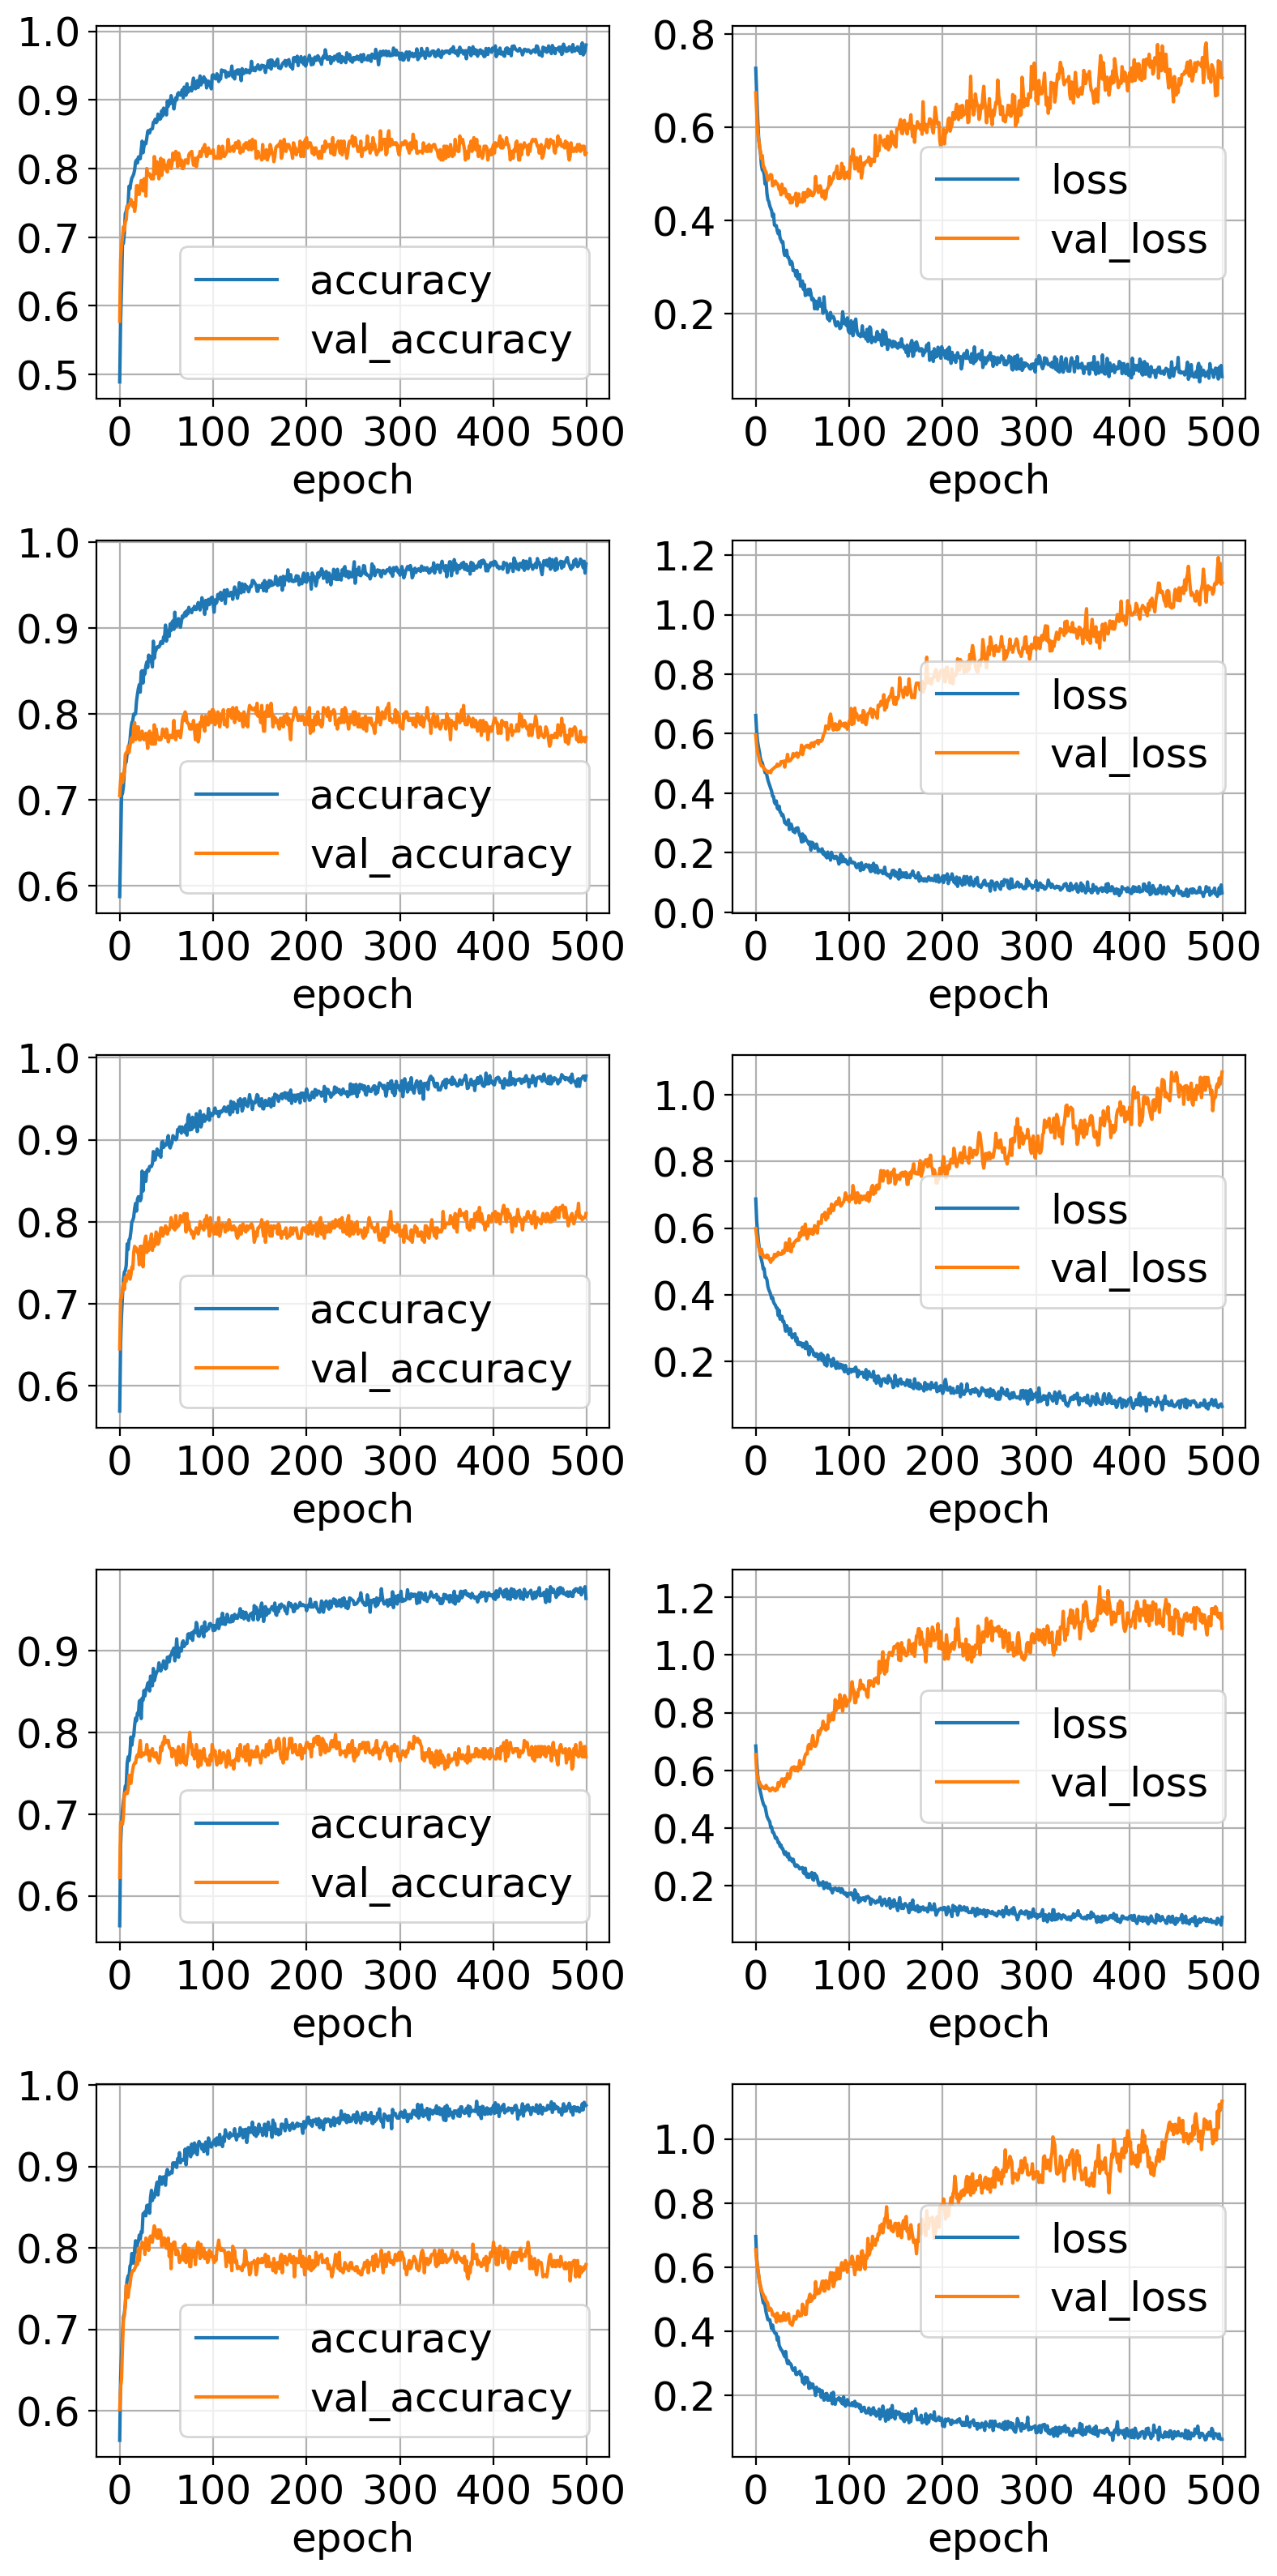

In [30]:
fig, axes = plt.subplots(5, 2, figsize=(8, 16))

for history, [ax1, ax2] in zip(histories, axes):
    plot_history(history, ax1, ax2)
    
fig.tight_layout()
#fig.savefig('h1.png')

In [12]:
histories_hidden = []
scores = []

for train_index, test_index in kf.split(XHidden, Y_d_hidden):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y_d[train_index], Y_d[test_index]
    model = keras.models.Sequential([
        keras.layers.Dense(max_review_length, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(value_tactic, activation='softmax')
    ])
        score = model.evaluate(XTest, Y_d_test, verbose=0)
    #print("Точность обучения: {0:.2%}".format(score[1]))
    scores.append(score)
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=75, batch_size=10, verbose=1, validation_data=(X_test, Y_test))
    histories.append(history)

Epoch 1/75
86/86 [==============================] - 1s 6ms/step - loss: 2.3833 - accuracy: 0.1559 - val_loss: 2.2388 - val_accuracy: 0.2056
Epoch 2/75
86/86 [==============================] - 0s 2ms/step - loss: 2.0954 - accuracy: 0.2661 - val_loss: 1.9464 - val_accuracy: 0.3411
Epoch 3/75
86/86 [==============================] - 0s 2ms/step - loss: 1.7899 - accuracy: 0.4490 - val_loss: 1.7033 - val_accuracy: 0.4159
Epoch 4/75
86/86 [==============================] - 0s 2ms/step - loss: 1.5634 - accuracy: 0.5193 - val_loss: 1.5365 - val_accuracy: 0.4766
Epoch 5/75
86/86 [==============================] - 0s 2ms/step - loss: 1.3900 - accuracy: 0.5498 - val_loss: 1.4096 - val_accuracy: 0.5374
Epoch 6/75
86/86 [==============================] - 0s 3ms/step - loss: 1.2555 - accuracy: 0.6014 - val_loss: 1.3529 - val_accuracy: 0.5607
Epoch 7/75
86/86 [==============================] - 0s 2ms/step - loss: 1.1722 - accuracy: 0.6131 - val_loss: 1.2946 - val_accuracy: 0.5607
Epoch 8/75
86/86 [==

In [13]:
fig, axes = plt.subplots(5, 2, figsize=(8, 16))

for history, [ax1, ax2] in zip(histories_hidden, axes):
    plot_history(history, ax1, ax2)
    
fig.tight_layout()
#fig.savefig('h1_hidden.png')

In [135]:
def eval_histories(histories):
    data = []
    for history in histories:
        datum = {}
        for k, v in history.history.items():
            datum[k] = v[-1]
        data.append(datum)
    df_e = pd.DataFrame(data)
    df_e.loc['mean'] = df_e.mean()
    return df_e

df_e = eval_histories(histories)

df_e

loss 
 accuracy 
 val_loss 
 val_accuracy 
 
 
 
 
 0 
 9.205349e-05 
 1.0 
 2.031639 
 0.832500 
 
 
 1 
 6.100711e-05 
 1.0 
 4.061638 
 0.760000 
 
 
 2 
 6.781258e-07 
 1.0 
 3.031691 
 0.802500 
 
 
 3 
 4.931627e-07 
 1.0 
 3.653501 
 0.777500 
 
 
 4 
 5.934406e-06 
 1.0 
 3.819283 
 0.771930 
 
 
 mean 
 3.203326e-05 
 1.0 
 3.319551 
 0.788886

In [144]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

histories_2 = []
scores_2 = []

for train_index, test_index in kf.split(X, Y_d):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y_d[train_index], Y_d[test_index]
    model = keras.models.Sequential([
        keras.layers.Dense(max_review_length, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(value_tactic, activation='softmax')
    ])
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=350, batch_size=10, verbose=1, validation_data=(X_test, Y_test))
    scoreT = model.evaluate(XTest, Y_d_test, verbose=0)
    #print("Точность обучения: {0:.2%}".format(score[1]))
    scores_2.append(scoreT)
    histories_2.append(history)

Epoch 80/350
160/160 [==============================] - 0s 2ms/step - loss: 2.6621e-05 - accuracy: 1.0000 - val_loss: 2.1717 - val_accuracy: 0.7900
Epoch 81/350
160/160 [==============================] - 0s 2ms/step - loss: 2.3643e-05 - accuracy: 1.0000 - val_loss: 2.1933 - val_accuracy: 0.7900
Epoch 82/350
160/160 [==============================] - 0s 2ms/step - loss: 2.1284e-05 - accuracy: 1.0000 - val_loss: 2.2153 - val_accuracy: 0.7900
Epoch 83/350
160/160 [==============================] - 0s 2ms/step - loss: 1.9054e-05 - accuracy: 1.0000 - val_loss: 2.2366 - val_accuracy: 0.7900
Epoch 84/350
160/160 [==============================] - 0s 2ms/step - loss: 1.7559e-05 - accuracy: 1.0000 - val_loss: 2.2623 - val_accuracy: 0.7925
Epoch 85/350
160/160 [==============================] - 0s 2ms/step - loss: 1.5482e-05 - accuracy: 1.0000 - val_loss: 2.2868 - val_accuracy: 0.7925
Epoch 86/350
160/160 [==============================] - 0s 2ms/step - loss: 1.4112e-05 - accuracy: 1.0000 - val_

In [145]:
for scoreItem in scores_2:
    print("Точность обучения: {0:.2%}".format(scoreItem[1]))
    #print(scoreItem)

Точность обучения: 75.76%
Точность обучения: 73.83%
Точность обучения: 79.06%
Точность обучения: 77.41%
Точность обучения: 77.69%


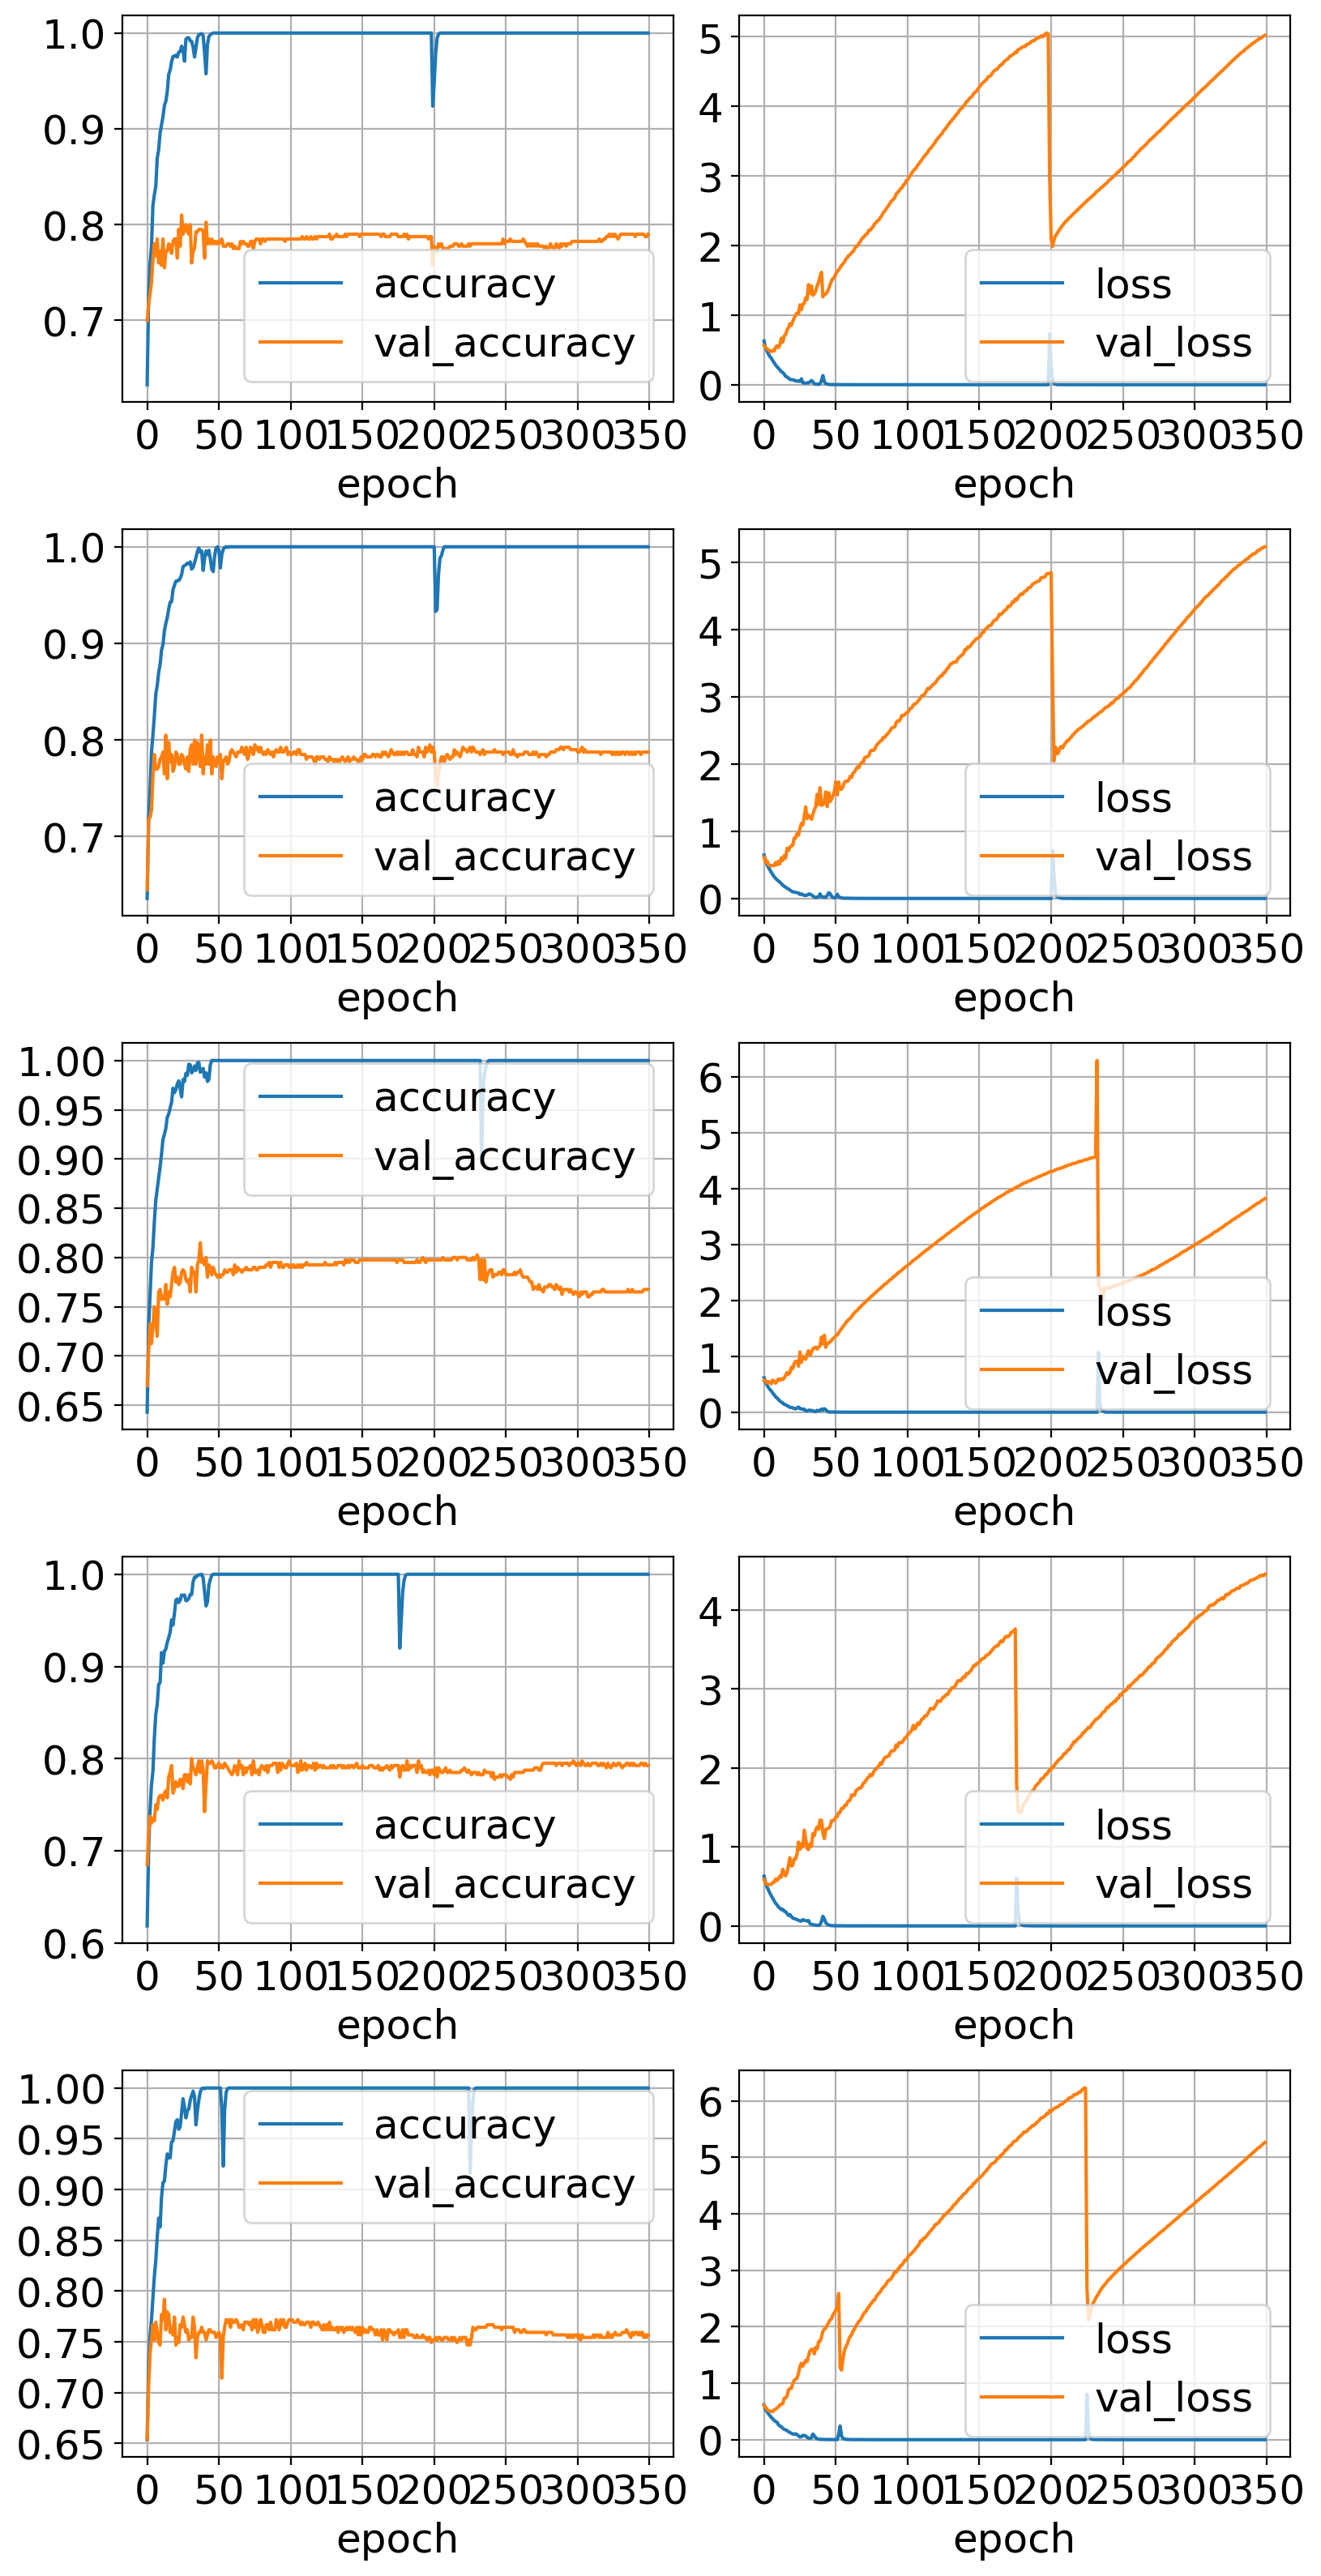

In [146]:
fig, axes = plt.subplots(5, 2, figsize=(8, 16))

for history, [ax1, ax2] in zip(histories_2, axes):
    plot_history(history, ax1, ax2)
    
    
fig.tight_layout()
# fig.savefig('img/h2.png')

In [14]:
df_e2 = eval_histories(histories_2)

   
df_e2

NameError: NameError: name 'eval_histories' is not defined

In [15]:
kf = KFold(n_splits=2, shuffle=True, random_state=42)

histories_3 = []

for train_index, test_index in kf.split(X, Y_d):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y_d[train_index], Y_d[test_index]
    model = keras.models.Sequential([
        keras.layers.Dense(4, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(6, activation='softmax')
    ])
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=25, verbose=0, validation_data=(X_test, Y_test))
    histories_3.append(history)

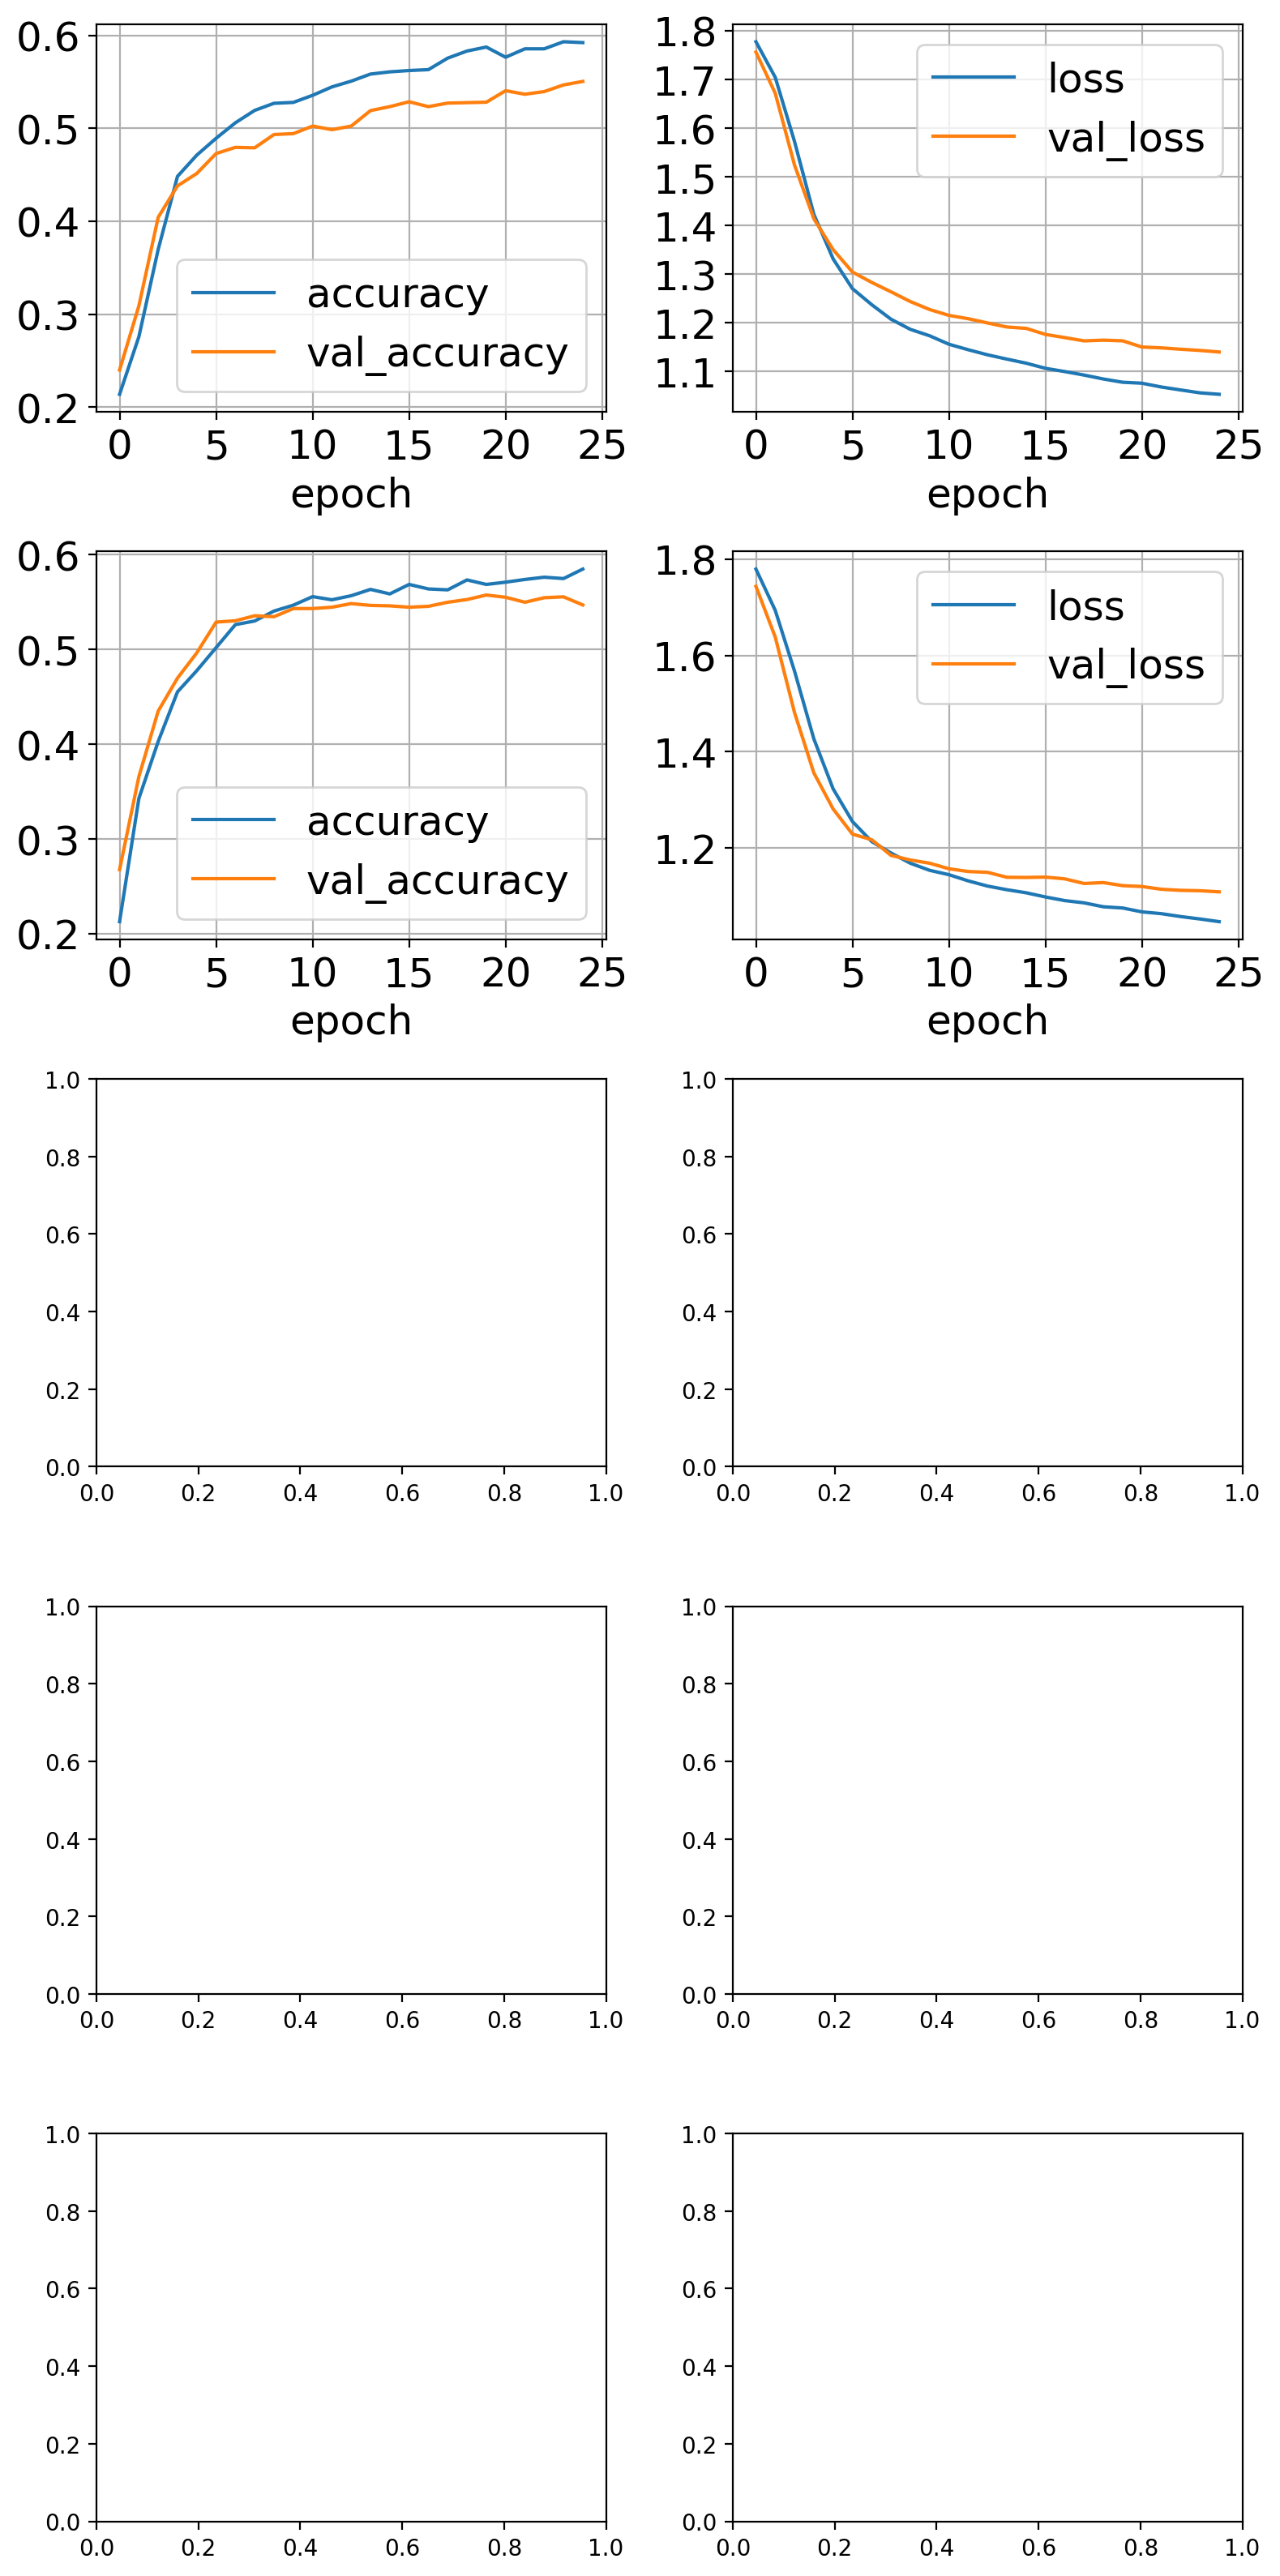

In [16]:
fig, axes = plt.subplots(5, 2, figsize=(8, 16))

for history, [ax1, ax2] in zip(histories_3, axes):
    plot_history(history, ax1, ax2)
    
fig.tight_layout()
# fig.savefig('img/h3.png')

In [17]:
df_e3 = eval_histories(histories_3)

df_e3

NameError: NameError: name 'eval_histories' is not defined

In [19]:
kf = KFold(n_splits=2, shuffle=True, random_state=42)

histories_4 = []

for train_index, test_index in kf.split(X, Y_d):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y_d[train_index], Y_d[test_index]
    model = keras.models.Sequential([
        keras.layers.Dense(4, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(6, activation='softmax')
    ])
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=25, verbose=0, validation_data=(X_test, Y_test))
    histories_4.append(history)

In [22]:
df_e4 = eval_histories(histories_4)

df_e4

loss 
 accuracy 
 val_loss 
 val_accuracy 
 
 
 
 
 0 
 0.757794 
 0.717384 
 0.873007 
 0.676754 
 
 
 1 
 0.748740 
 0.706713 
 0.926754 
 0.629986 
 
 
 2 
 0.668034 
 0.737096 
 0.909008 
 0.655647 
 
 
 3 
 0.742501 
 0.704405 
 0.931908 
 0.629477 
 
 
 4 
 0.760345 
 0.703372 
 0.849541 
 0.666667 
 
 
 mean 
 0.735483 
 0.713794 
 0.898043 
 0.651706

In [23]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

histories_5 = []

for train_index, test_index in kf.split(X, Y_d):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y_d[train_index], Y_d[test_index]
    model = keras.models.Sequential([
        keras.layers.Dense(4, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=75, verbose=0, validation_data=(X_test, Y_test))
    histories_5.append(history)

In [24]:
df_e5 = eval_histories(histories_5)

df_e5

loss 
 accuracy 
 val_loss 
 val_accuracy 
 
 
 
 
 0 
 0.815057 
 0.688812 
 0.871571 
 0.679505 
 
 
 1 
 0.815286 
 0.688124 
 0.967785 
 0.640990 
 
 
 2 
 0.868692 
 0.663111 
 0.984356 
 0.606061 
 
 
 3 
 0.861582 
 0.669305 
 0.969669 
 0.611570 
 
 
 4 
 0.860101 
 0.664487 
 0.867242 
 0.654270 
 
 
 mean 
 0.844144 
 0.674768 
 0.932125 
 0.638479

In [25]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

histories_6 = []

for train_index, test_index in kf.split(X, Y_d):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y_d[train_index], Y_d[test_index]
    model = keras.models.Sequential([
        keras.layers.Dense(4, activation='relu'),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=75, verbose=1, validation_data=(X_test, Y_test))
    histories_6.append(history)

Epoch 1/75
91/91 [==============================] - 1s 4ms/step - loss: 1.5652 - accuracy: 0.2878 - val_loss: 1.4907 - val_accuracy: 0.3343
Epoch 2/75
91/91 [==============================] - 0s 2ms/step - loss: 1.3346 - accuracy: 0.4272 - val_loss: 1.2565 - val_accuracy: 0.4470
Epoch 3/75
91/91 [==============================] - 0s 2ms/step - loss: 1.1989 - accuracy: 0.4864 - val_loss: 1.1701 - val_accuracy: 0.4966
Epoch 4/75
91/91 [==============================] - 0s 2ms/step - loss: 1.1318 - accuracy: 0.5308 - val_loss: 1.1088 - val_accuracy: 0.5420
Epoch 5/75
91/91 [==============================] - 0s 2ms/step - loss: 1.0875 - accuracy: 0.5497 - val_loss: 1.0780 - val_accuracy: 0.5585
Epoch 6/75
91/91 [==============================] - 0s 2ms/step - loss: 1.0507 - accuracy: 0.5714 - val_loss: 1.0613 - val_accuracy: 0.5640
Epoch 7/75
91/91 [==============================] - 0s 2ms/step - loss: 1.0248 - accuracy: 0.5811 - val_loss: 1.0338 - val_accuracy: 0.5722
Epoch 8/75
91/91 [==

In [26]:
df_e6 = eval_histories(histories_6)

df_e6

loss 
 accuracy 
 val_loss 
 val_accuracy 
 
 
 
 
 0 
 0.757587 
 0.703614 
 0.855765 
 0.662999 
 
 
 1 
 0.754149 
 0.699828 
 0.970176 
 0.628611 
 
 
 2 
 0.742911 
 0.710255 
 0.952057 
 0.641873 
 
 
 3 
 0.750677 
 0.695802 
 0.826838 
 0.677686 
 
 
 4 
 0.868680 
 0.647970 
 0.931040 
 0.623967 
 
 
 mean 
 0.774801 
 0.691494 
 0.907175 
 0.647027